In [68]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [69]:
# Load the dataset
df = pd.read_csv('Newborn Health Monitoring Dataset/newborn_health_monitoring_with_risk.csv')

In [70]:
missing_vals = df.isnull().sum()
missing_vals

baby_id                           0
name                              0
gender                            0
gestational_age_weeks             0
birth_weight_kg                   0
birth_length_cm                   0
birth_head_circumference_cm       0
date                              0
age_days                          0
weight_kg                         0
length_cm                         0
head_circumference_cm             0
temperature_c                     0
heart_rate_bpm                    0
respiratory_rate_bpm              0
oxygen_saturation                 0
feeding_type                      0
feeding_frequency_per_day         0
urine_output_count                0
stool_count                       0
jaundice_level_mg_dl              0
apgar_score                    2900
immunizations_done                0
reflexes_normal                   0
risk_level                        0
dtype: int64

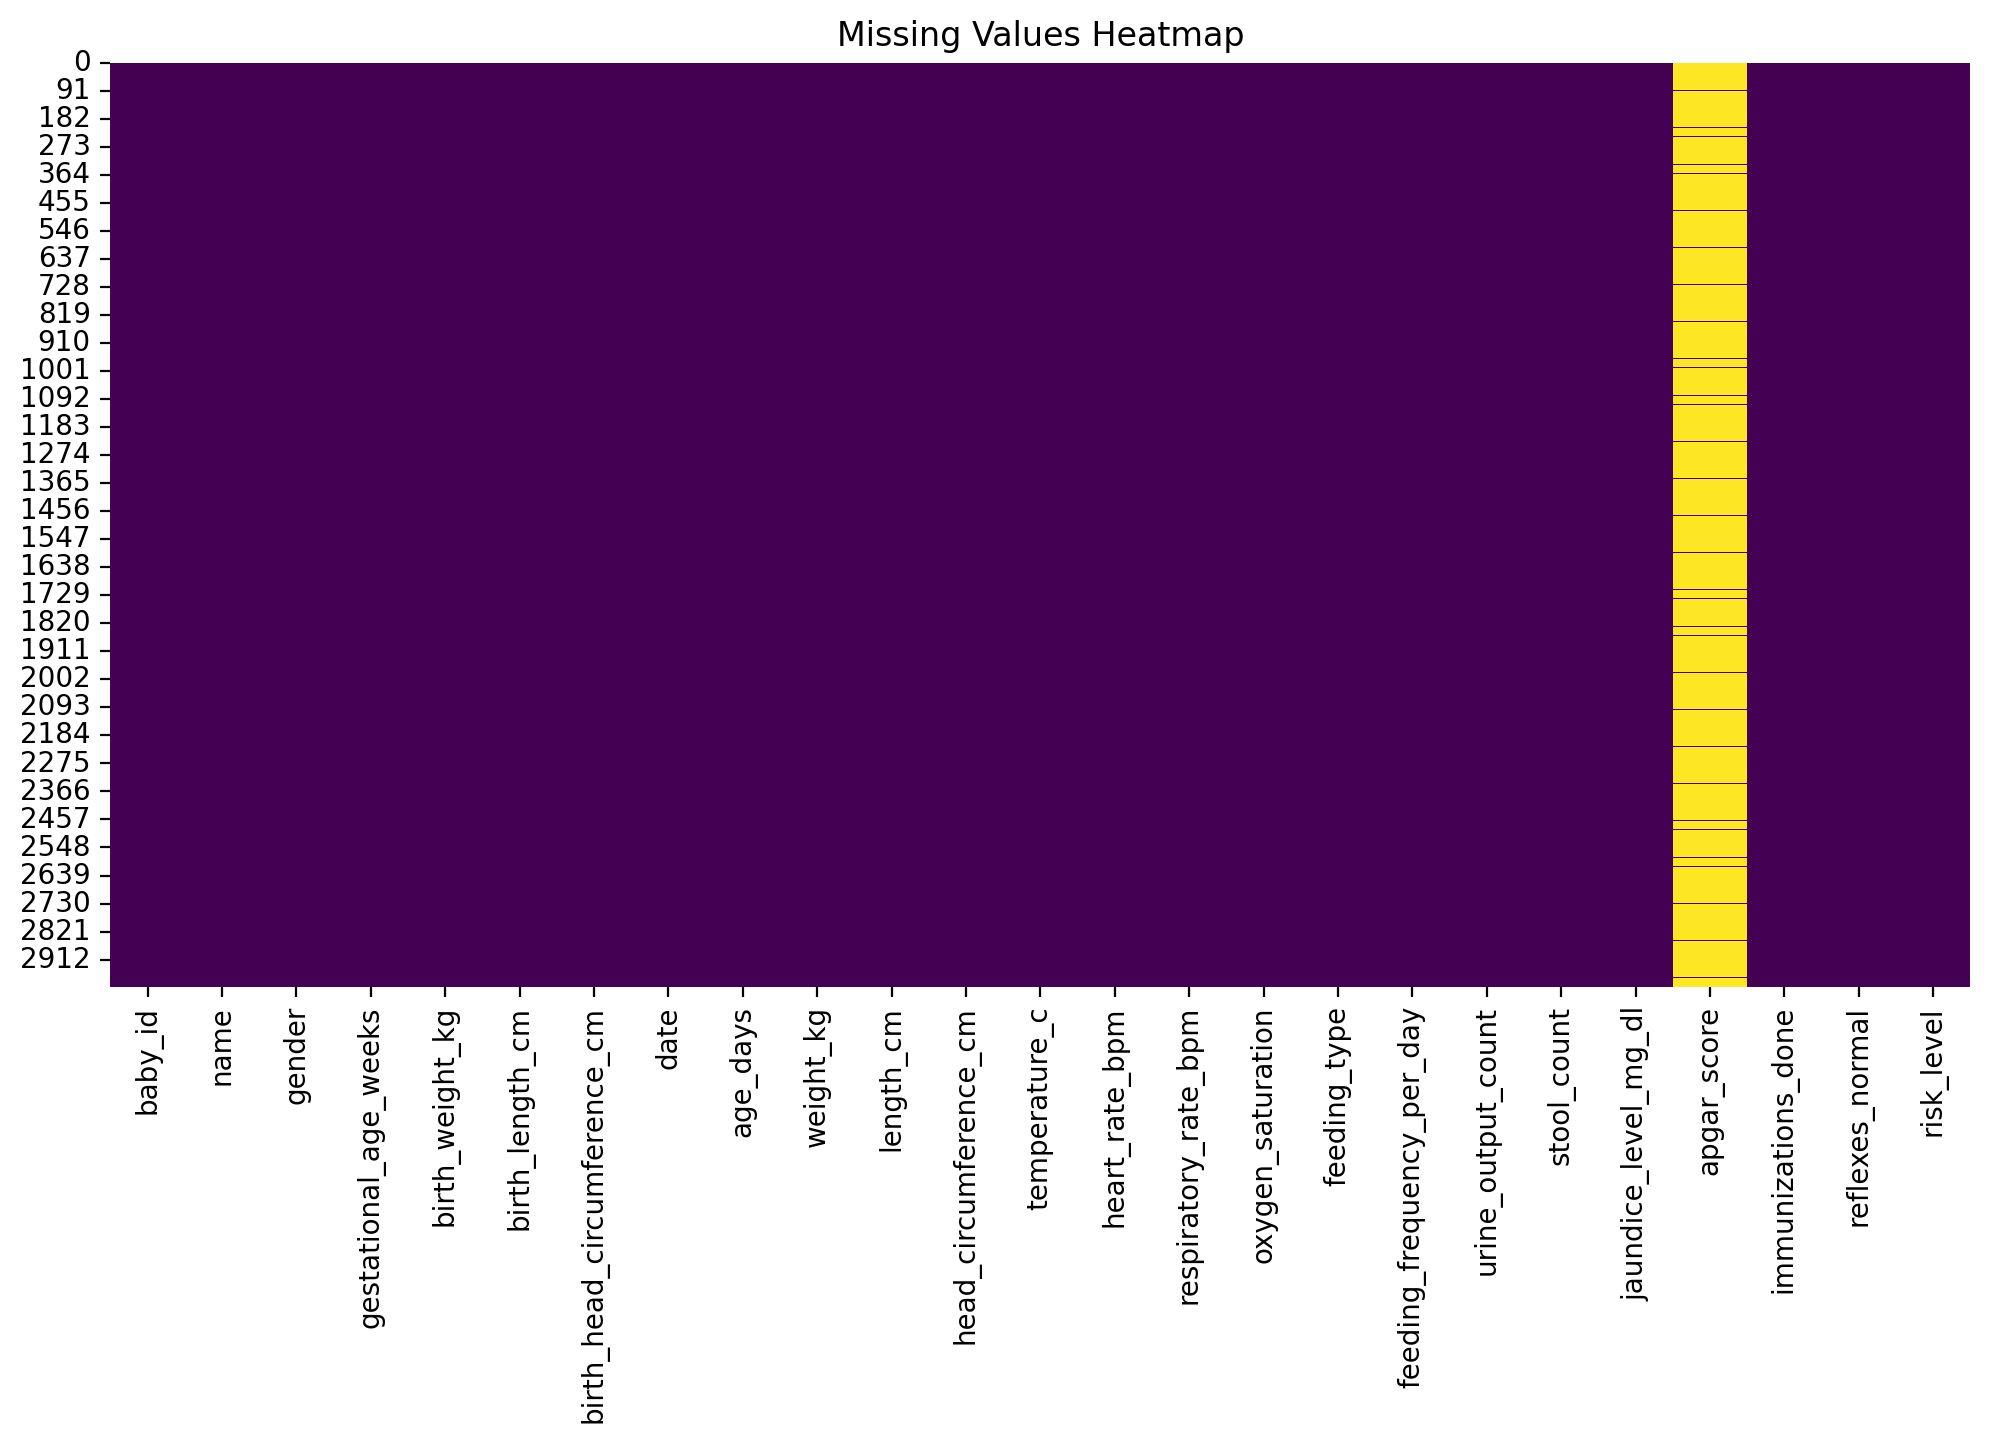

In [71]:
# Visualize missing data with a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [72]:
#Discretizing data - encoding feeding_type using one hot encoding

df = pd.get_dummies(df, columns=['feeding_type'], dtype=int)
df

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed
0,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-10,1,3.28,...,9,0,4.2,7.0,Yes,Yes,At Risk,0,1,0
1,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-11,2,3.35,...,5,2,10.6,NaN,No,No,At Risk,0,1,0
2,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-12,3,3.35,...,6,5,9.8,NaN,No,No,Healthy,1,0,0
3,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-13,4,3.48,...,8,4,8.1,NaN,No,Yes,Healthy,0,0,1
4,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-14,5,3.50,...,7,1,11.6,NaN,No,Yes,At Risk,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-03-31,26,5.29,...,7,4,4.0,NaN,No,Yes,Healthy,0,1,0
2996,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-01,27,5.23,...,6,1,2.4,NaN,No,Yes,Healthy,1,0,0
2997,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-02,28,5.29,...,4,1,3.6,NaN,No,Yes,Healthy,1,0,0
2998,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-03,29,5.39,...,5,2,2.2,NaN,No,No,Healthy,0,0,1


In [73]:
#Converting immunizations and reflexes column. True - 1 and False - 0

df['immunizations_done'] = df['immunizations_done'].replace({'Yes': 1, 'No': 0})
df['reflexes_normal'] = df['reflexes_normal'].replace({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed
0,B001,Sara,0,40.2,3.30,50.0,31.9,2024-12-10,1,3.28,...,9,0,4.2,7.0,1,1,At Risk,0,1,0
1,B001,Sara,0,40.2,3.30,50.0,31.9,2024-12-11,2,3.35,...,5,2,10.6,NaN,0,0,At Risk,0,1,0
2,B001,Sara,0,40.2,3.30,50.0,31.9,2024-12-12,3,3.35,...,6,5,9.8,NaN,0,0,Healthy,1,0,0
3,B001,Sara,0,40.2,3.30,50.0,31.9,2024-12-13,4,3.48,...,8,4,8.1,NaN,0,1,Healthy,0,0,1
4,B001,Sara,0,40.2,3.30,50.0,31.9,2024-12-14,5,3.50,...,7,1,11.6,NaN,0,1,At Risk,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,B100,Brian,1,39.1,4.47,50.8,36.3,2025-03-31,26,5.29,...,7,4,4.0,NaN,0,1,Healthy,0,1,0
2996,B100,Brian,1,39.1,4.47,50.8,36.3,2025-04-01,27,5.23,...,6,1,2.4,NaN,0,1,Healthy,1,0,0
2997,B100,Brian,1,39.1,4.47,50.8,36.3,2025-04-02,28,5.29,...,4,1,3.6,NaN,0,1,Healthy,1,0,0
2998,B100,Brian,1,39.1,4.47,50.8,36.3,2025-04-03,29,5.39,...,5,2,2.2,NaN,0,0,Healthy,0,0,1


In [74]:
#Counting at risk and healthy to measure class imbalances
class_counts = df['risk_level'].value_counts()
class_counts

risk_level
Healthy    2602
At Risk     398
Name: count, dtype: int64

In [75]:
# Drop non-predictive and identifier columns
df = df.drop(columns=['apgar_score'])
print("'apgar_score' column removed.")

df = df.drop(columns=['jaundice_level_mg_dl'])
print("'jaundice_level_mg_dl' column removed.")

df = df.drop(columns=['baby_id'])
print("'baby_id' column removed.")

df = df.drop(columns=['name'])
print("'name' column removed.")

# Drop date column - we already have age_days for temporal information
df = df.drop(columns=['date'])
print("'date' column removed.")

# Also drop birth-related columns to avoid data leakage (these are constants per baby)
df = df.drop(columns=['birth_weight_kg', 'birth_length_cm', 'birth_head_circumference_cm'])

df

'apgar_score' column removed.
'jaundice_level_mg_dl' column removed.
'baby_id' column removed.
'name' column removed.
'date' column removed.


,gender,gestational_age_weeks,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,immunizations_done,reflexes_normal,risk_level,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed
0,0,40.2,1,3.28,50.1,32.0,37.0,160,36,98,11,9,0,1,1,At Risk,0,1,0
1,0,40.2,2,3.35,50.2,32.0,37.2,156,40,99,11,5,2,0,0,At Risk,0,1,0
2,0,40.2,3,3.35,50.6,32.1,37.1,137,37,97,7,6,5,0,0,Healthy,1,0,0
3,0,40.2,4,3.48,50.3,32.0,37.4,130,33,97,11,8,4,0,1,Healthy,0,0,1
4,0,40.2,5,3.50,50.3,31.8,36.8,138,39,96,11,7,1,0,1,At Risk,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,39.1,26,5.29,52.4,36.9,36.7,125,44,96,8,7,4,0,1,Healthy,0,1,0
2996,1,39.1,27,5.23,52.1,36.8,37.0,138,31,98,7,6,1,0,1,Healthy,1,0,0
2997,1,39.1,28,5.29,52.3,36.7,36.8,143,42,98,8,4,1,0,1,Healthy,1,0,0
2998,1,39.1,29,5.39,52.4,37.0,37.4,119,52,97,10,5,2,0,0,Healthy,0,0,1


In [76]:
verify_missing_vals = df.isnull().sum()
verify_missing_vals

gender                        0
gestational_age_weeks         0
age_days                      0
weight_kg                     0
length_cm                     0
head_circumference_cm         0
temperature_c                 0
heart_rate_bpm                0
respiratory_rate_bpm          0
oxygen_saturation             0
feeding_frequency_per_day     0
urine_output_count            0
stool_count                   0
immunizations_done            0
reflexes_normal               0
risk_level                    0
feeding_type_Breastfeeding    0
feeding_type_Formula          0
feeding_type_Mixed            0
dtype: int64

## Descriptive Statistics and Relationship Analysis

In [77]:
# Descriptive statistics for all columns
desc_stats = df.describe(include='all')
desc_stats

,gender,gestational_age_weeks,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,immunizations_done,reflexes_normal,risk_level,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2602,NaN,NaN,NaN
mean,0.550000,38.878000,15.500000,3.669730,50.508000,34.438900,37.002933,139.682000,39.421333,97.473000,9.450000,6.470000,2.448333,0.066667,0.761000,NaN,0.336333,0.332667,0.331000
std,0.497577,1.570076,8.656884,0.621355,2.196846,1.500893,0.310747,10.139386,4.999481,1.048318,1.707182,1.700803,1.699106,0.249485,0.426544,NaN,0.472533,0.471247,0.470652
min,0.000000,35.400000,1.000000,1.790000,45.000000,31.100000,35.800000,100.000000,23.000000,94.000000,7.000000,4.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,37.800000,8.000000,3.220000,49.100000,33.300000,36.800000,133.000000,36.000000,97.000000,8.000000,5.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
50%,1.000000,38.800000,15.500000,3.660000,50.400000,34.400000,37.000000,140.000000,39.000000,97.000000,9.000000,6.000000,2.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
75%,1.000000,40.100000,23.000000,4.100000,51.800000,35.300000,37.200000,146.000000,43.000000,98.000000,11.000000,8.000000,4.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000


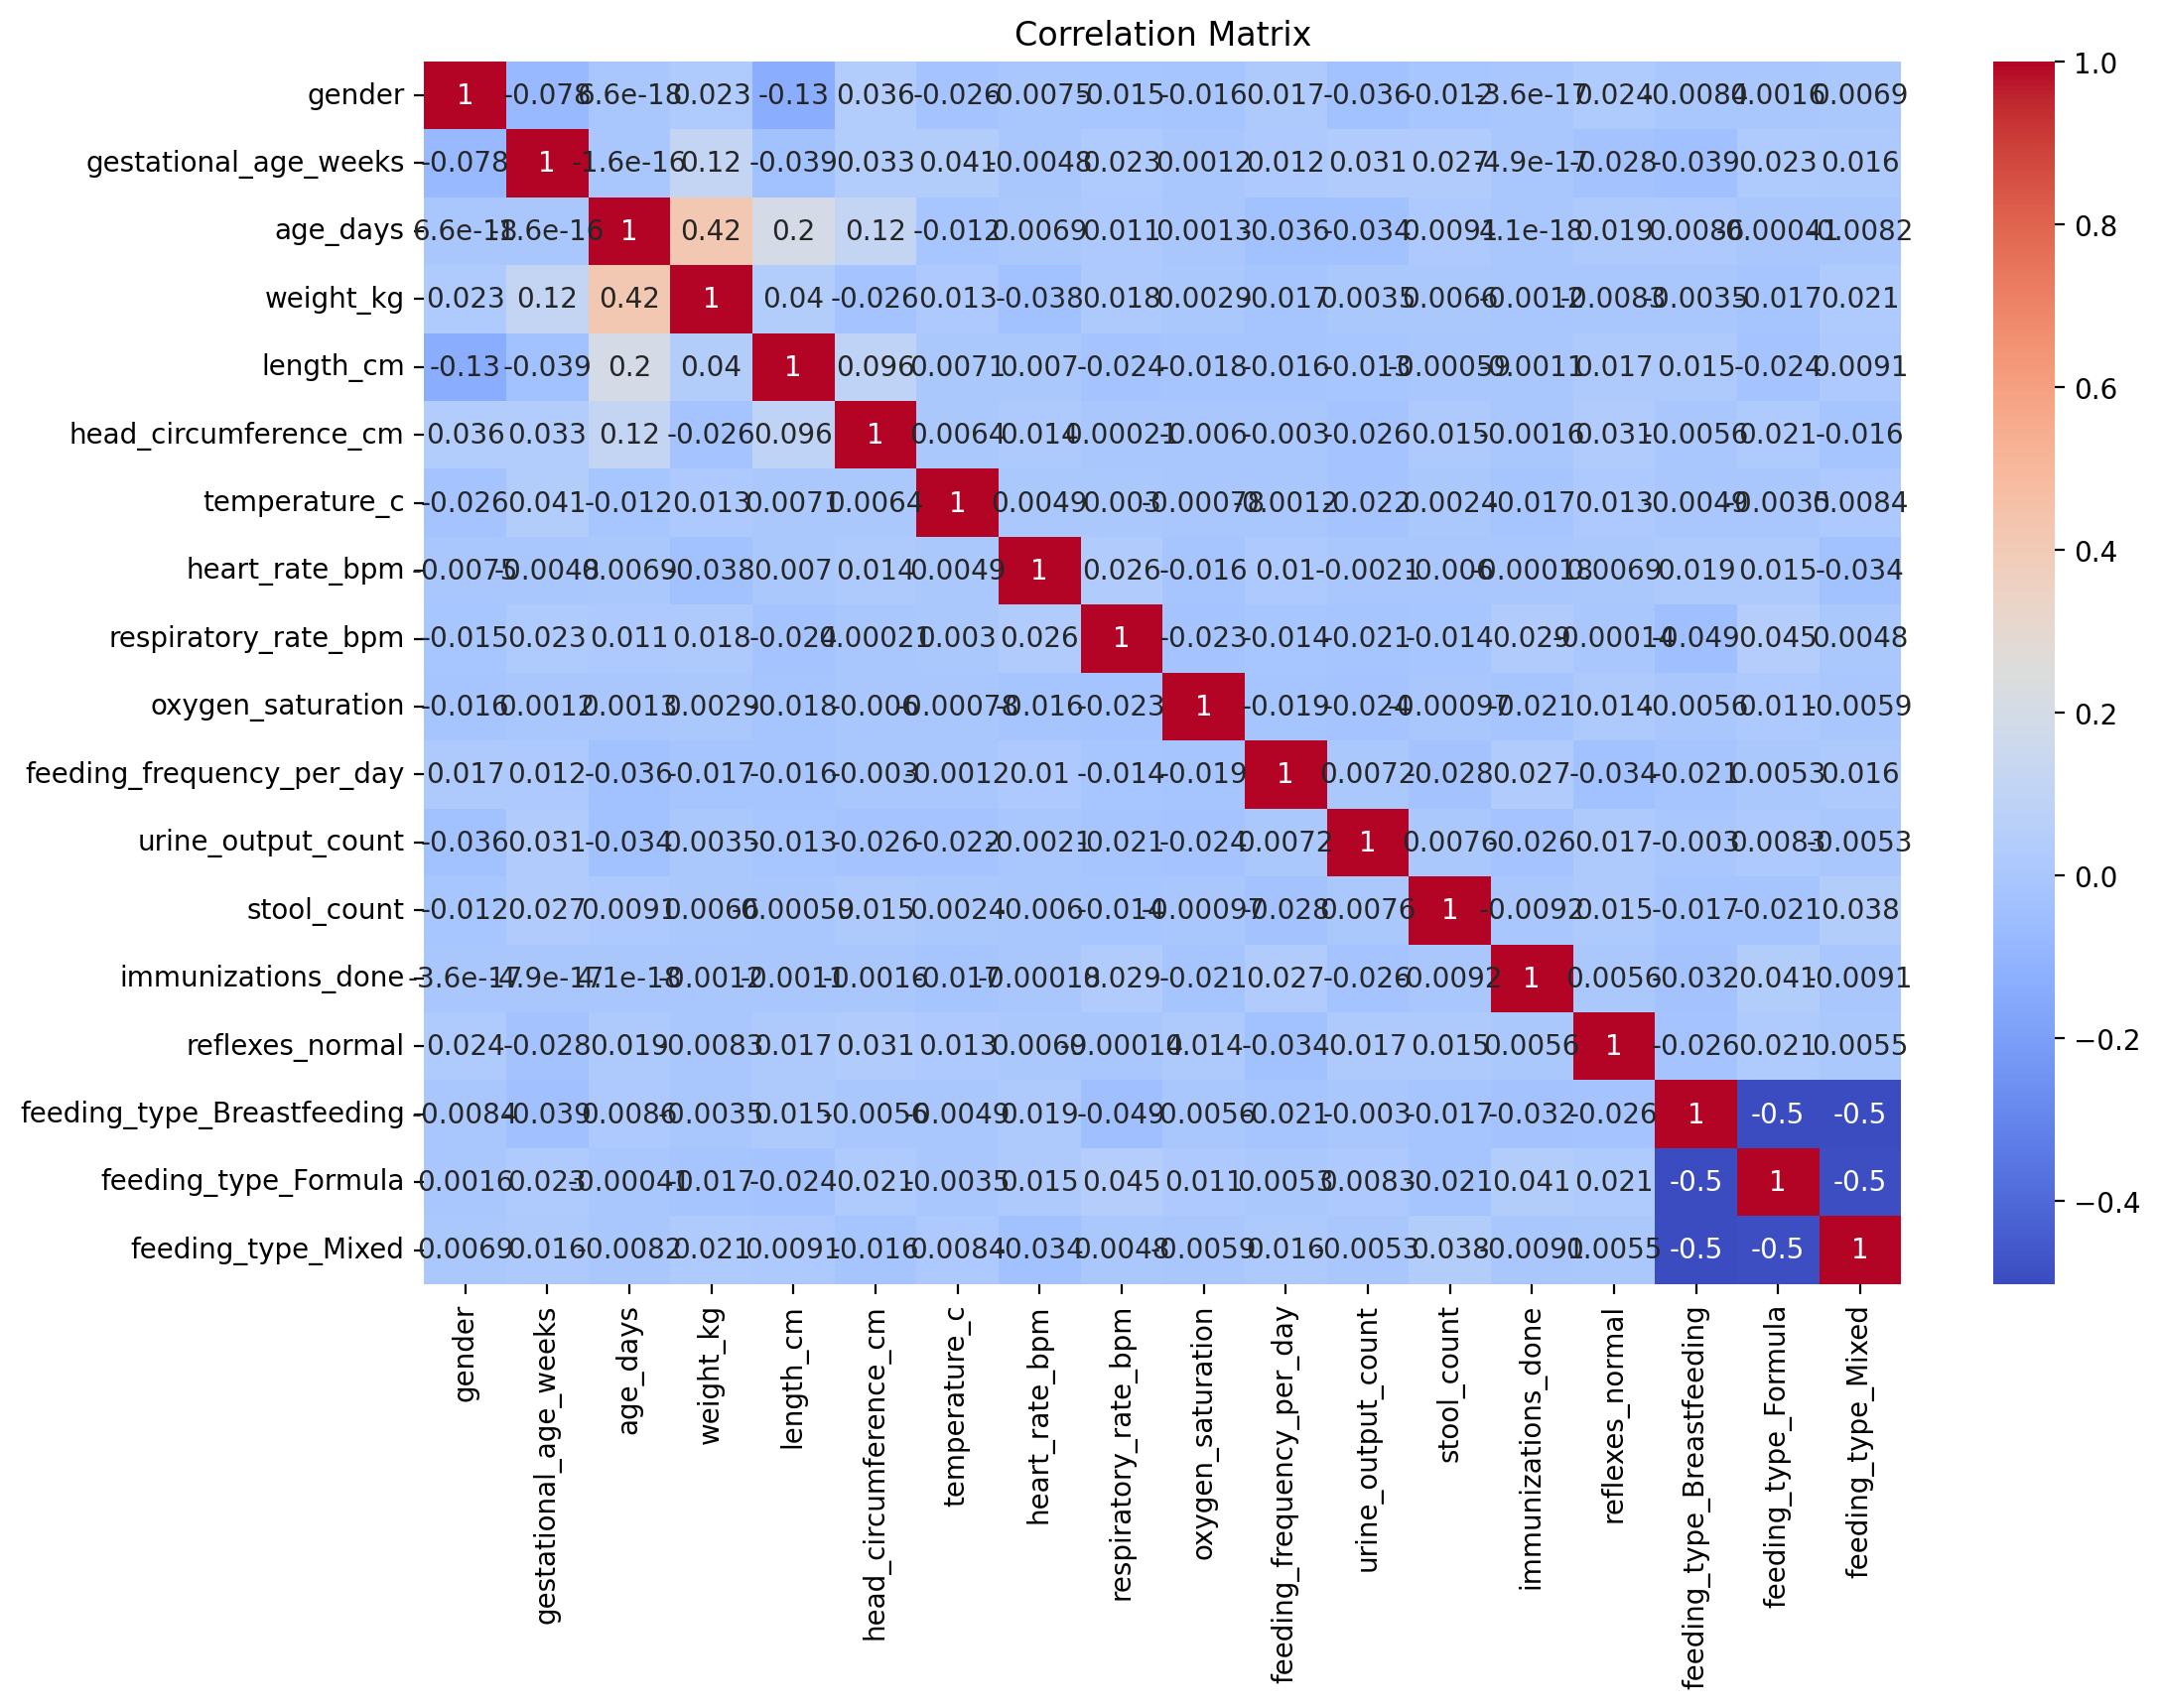

In [78]:
# Correlation matrix to quantify relationships between variables
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [79]:
# Cosine similarity and Euclidean distance between selected numeric features
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# similarity between first 5 samples
cos_sim = cosine_similarity(numeric_df.iloc[:5])
euc_dist = euclidean_distances(numeric_df.iloc[:5])
print('Cosine Similarity (first 5 samples):')
print(cos_sim)
print('\nEuclidean Distance (first 5 samples):')
print(euc_dist)

Cosine Similarity (first 5 samples):
[[1.         0.99938812 0.9964295  0.99466871 0.99702466]
 [0.99938812 1.         0.99796423 0.99601239 0.99838507]
 [0.9964295  0.99796423 1.         0.99914828 0.99939679]
 [0.99466871 0.99601239 0.99914828 1.         0.99891286]
 [0.99702466 0.99838507 0.99939679 0.99891286 1.        ]]

Euclidean Distance (first 5 samples):
[[ 0.          7.48698204 24.27498507 30.64702269 22.82911299]
 [ 7.48698204  0.         20.07934262 27.36908658 18.74119793]
 [24.27498507 20.07934262  0.          9.49773131  6.65526108]
 [30.64702269 27.36908658  9.49773131  0.         10.69581226]
 [22.82911299 18.74119793  6.65526108 10.69581226  0.        ]]


In [80]:
# Check the number of distinct baby_id values
#num_unique_babies = df['baby_id'].nunique()
#print(f"Number of distinct baby_id: {num_unique_babies}")

## Graphical Statistics: Visualizing Trends



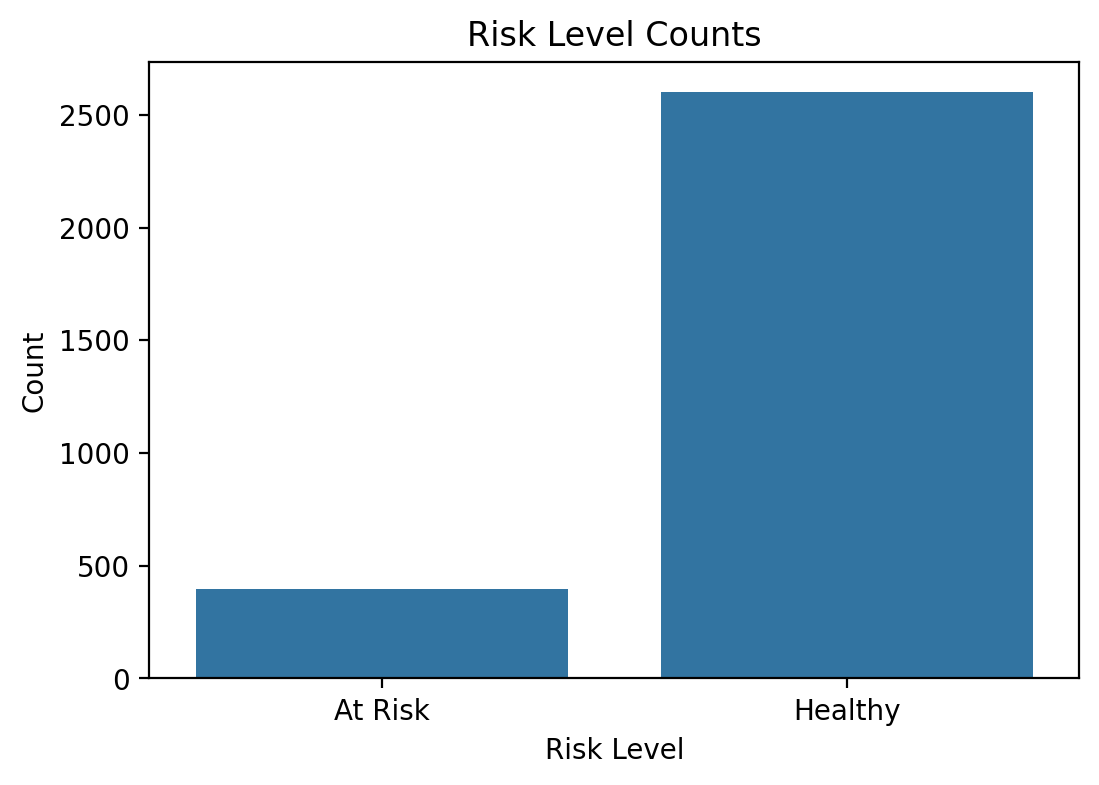

In [81]:
# Bar Chart: Risk Level Counts
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df)
plt.title('Risk Level Counts')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

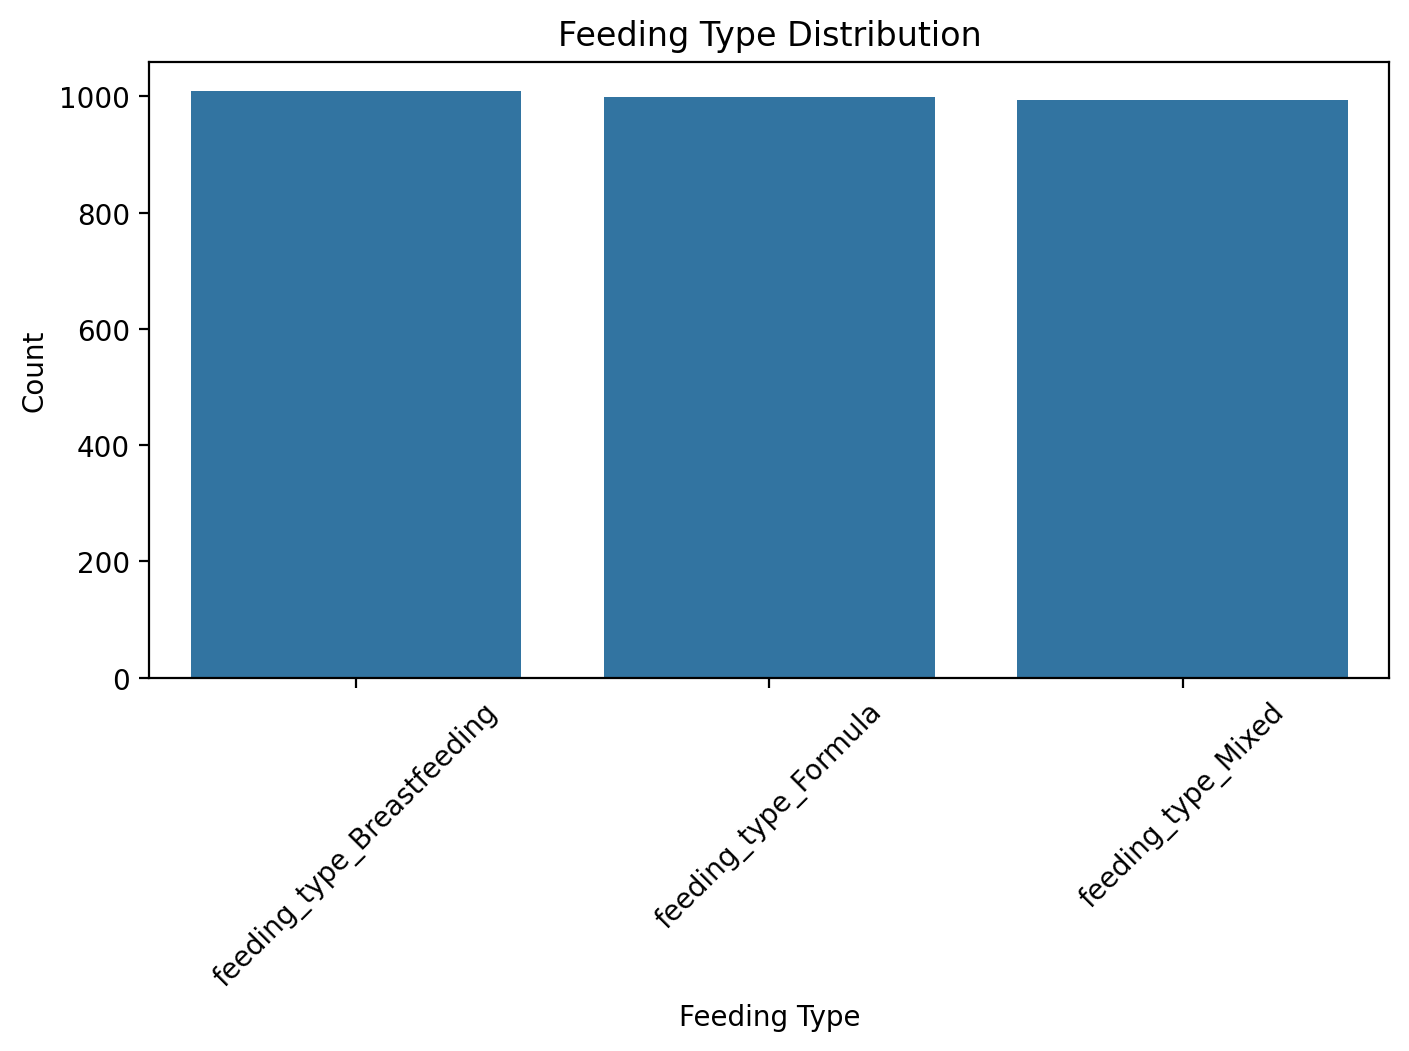

In [82]:
# Bar Chart: Feeding Type Distribution
feeding_cols = [col for col in df.columns if col.startswith('feeding_type_')]
feeding_counts = df[feeding_cols].sum()
plt.figure(figsize=(8,4))
sns.barplot(x=feeding_counts.index, y=feeding_counts.values)
plt.title('Feeding Type Distribution')
plt.xlabel('Feeding Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Visualizing Other Important Columns


In [83]:
# Identify other important columns for visualization
important_numeric = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'apgar_score']
important_categorical = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in ['apgar_score', 'baby_id']]
print('Numeric columns:', important_numeric)
print('Categorical columns:', important_categorical)

Numeric columns: ['gender', 'gestational_age_weeks', 'age_days', 'weight_kg', 'length_cm', 'head_circumference_cm', 'temperature_c', 'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation', 'feeding_frequency_per_day', 'urine_output_count', 'stool_count', 'immunizations_done', 'reflexes_normal', 'feeding_type_Breastfeeding', 'feeding_type_Formula', 'feeding_type_Mixed']
Categorical columns: ['risk_level']


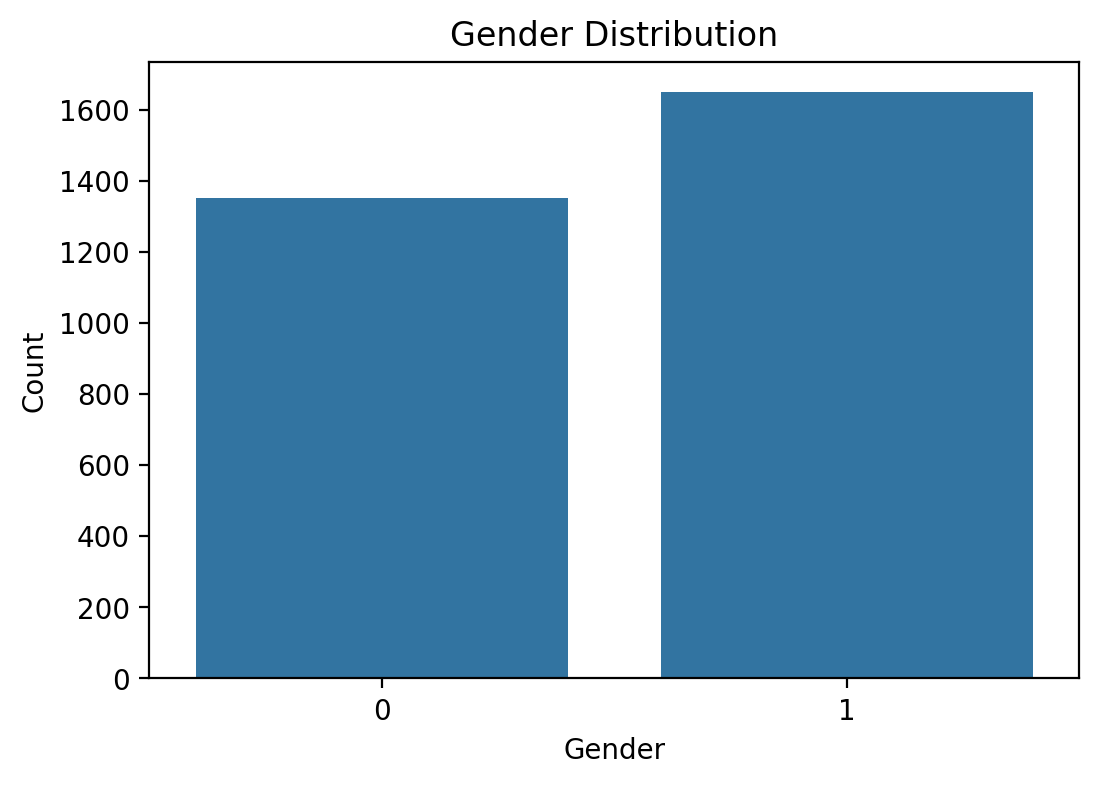

In [84]:
# Bar chart for gender distribution 
if 'gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='gender', data=df)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

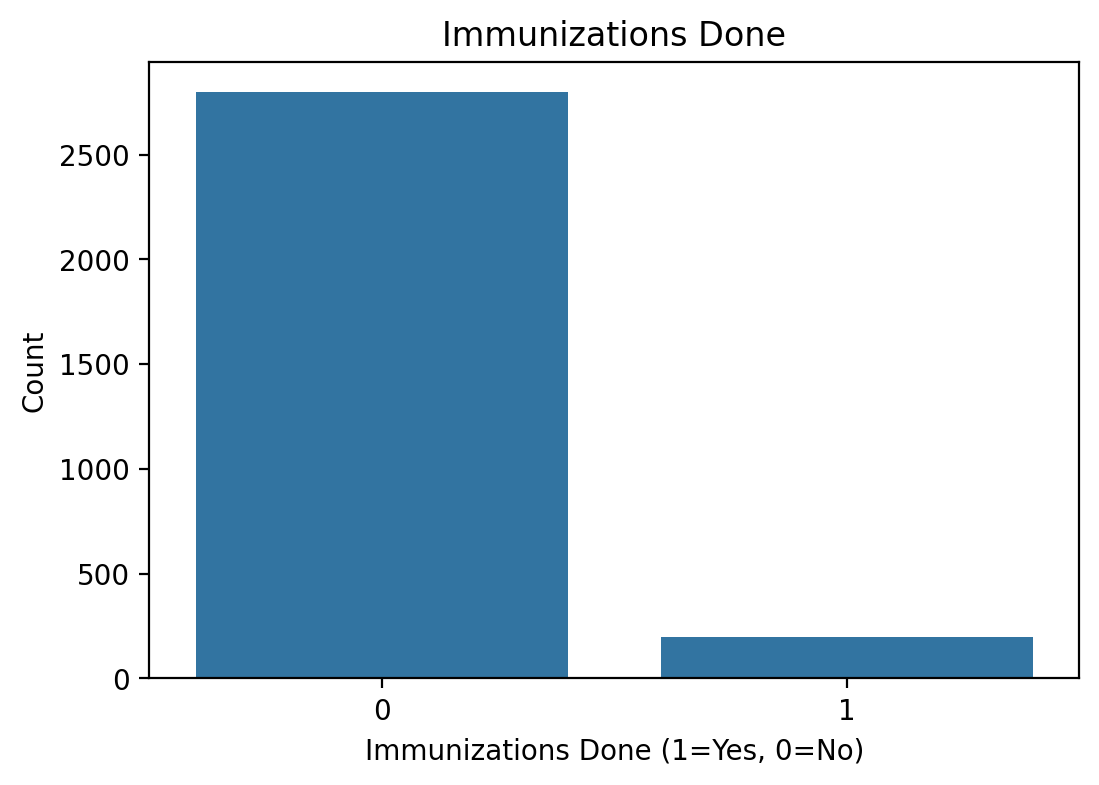

In [85]:
# Bar chart for immunizations_done 
if 'immunizations_done' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='immunizations_done', data=df)
    plt.title('Immunizations Done')
    plt.xlabel('Immunizations Done (1=Yes, 0=No)')
    plt.ylabel('Count')
    plt.show()

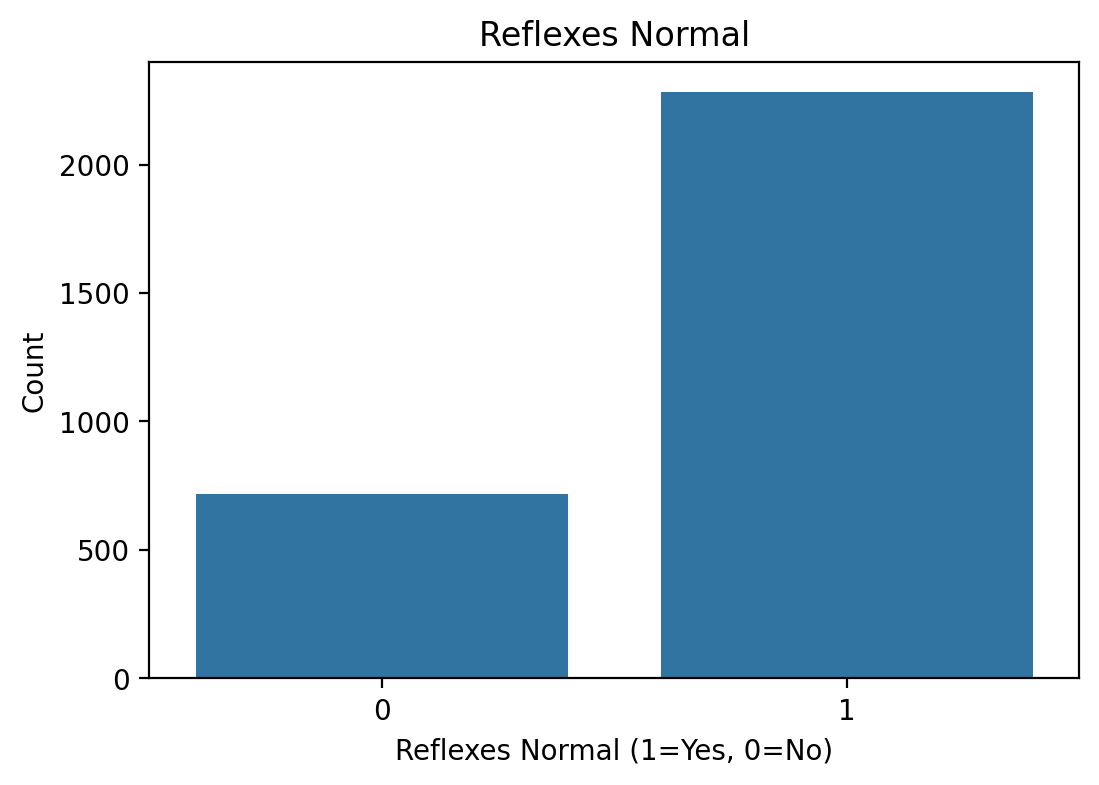

In [86]:
# Bar chart for reflexes_normal 
if 'reflexes_normal' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='reflexes_normal', data=df)
    plt.title('Reflexes Normal')
    plt.xlabel('Reflexes Normal (1=Yes, 0=No)')
    plt.ylabel('Count')
    plt.show()

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare features and labels
y = df['risk_level']
X = df.drop(columns=['risk_level'])

# All categorical variables already encoded in previous cells
# No need for pd.get_dummies() here
print(f'Features before split: {X.shape}')
print(f'Feature columns: {list(X.columns)}')

# Split: 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(f'\nTrain: {X_train.shape}, Test: {X_test.shape}')

Features before split: (3000, 18)
Feature columns: ['gender', 'gestational_age_weeks', 'age_days', 'weight_kg', 'length_cm', 'head_circumference_cm', 'temperature_c', 'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation', 'feeding_frequency_per_day', 'urine_output_count', 'stool_count', 'immunizations_done', 'reflexes_normal', 'feeding_type_Breastfeeding', 'feeding_type_Formula', 'feeding_type_Mixed']

Train: (2100, 18), Test: (900, 18)


In [88]:
# --- Apply SMOTE to handle class imbalance ---
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# First, encode the labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

print('Class distribution BEFORE SMOTE:')
unique, counts = np.unique(y_train_encoded, return_counts=True)
for u, c in zip(unique, counts):
    label_name = le.inverse_transform([u])[0]
    print(f'  {label_name}: {c} samples')

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

print('\nClass distribution AFTER SMOTE:')
unique, counts = np.unique(y_train_resampled, return_counts=True)
for u, c in zip(unique, counts):
    label_name = le.inverse_transform([u])[0]
    print(f'  {label_name}: {c} samples')

print(f'\nOriginal training set size: {len(X_train)}')
print(f'Resampled training set size: {len(X_train_resampled)}')


Class distribution BEFORE SMOTE:
  At Risk: 279 samples
  Healthy: 1821 samples

Class distribution AFTER SMOTE:
  At Risk: 1821 samples
  Healthy: 1821 samples

Original training set size: 2100
Resampled training set size: 3642


Training Accuracy (on resampled data): 1.0000
Training Accuracy (on original data): 1.0000
Training True Positive Rate (TPR/Recall): 1.0000
Training False Positive Rate (FPR): 0.0000


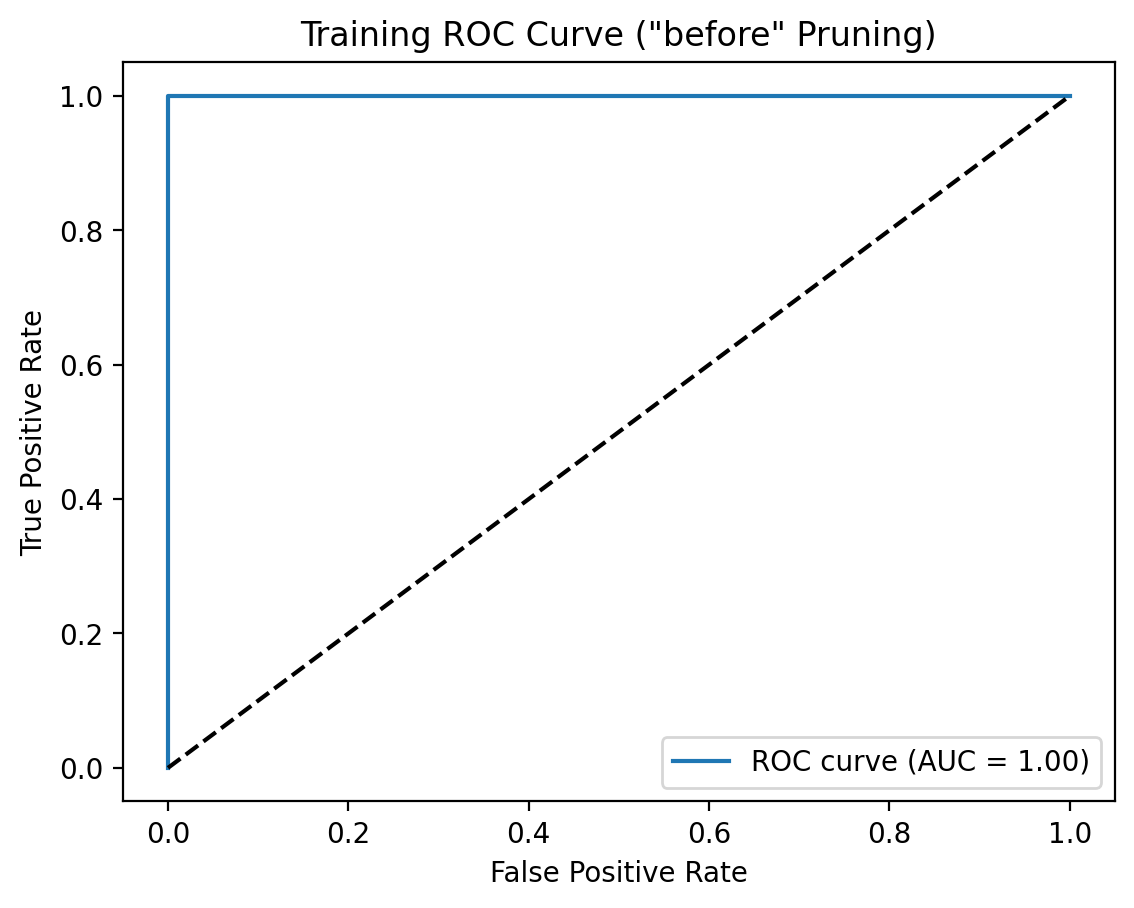

In [89]:
# --- Train the Decision Tree with SMOTE-resampled data ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train on SMOTE-resampled data 
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_resampled, y_train_resampled)

# Training accuracy on resampled data
train_pred_resampled = clf_tree.predict(X_train_resampled)
train_acc_resampled = accuracy_score(y_train_resampled, train_pred_resampled)
print(f'Training Accuracy (on resampled data): {train_acc_resampled:.4f}')

# Evaluate on original training set to get realistic metrics
train_pred = clf_tree.predict(X_train.values)
train_acc = accuracy_score(y_train_encoded, train_pred)
print(f'Training Accuracy (on original data): {train_acc:.4f}')

# --- Compute and print TPR, FPR, and plot ROC curve for training set ---
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
train_proba = clf_tree.predict_proba(X_train.values)

cm = confusion_matrix(y_train_encoded, train_pred)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(f"Training True Positive Rate (TPR/Recall): {tpr:.4f}")
print(f"Training False Positive Rate (FPR): {fpr:.4f}")
fpr_arr, tpr_arr, thresholds = roc_curve(y_train_encoded, train_proba[:, 1])
auc = roc_auc_score(y_train_encoded, train_proba[:, 1])
plt.plot(fpr_arr, tpr_arr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve ("before" Pruning)')
plt.legend()
plt.show()


In [90]:
print("Depth of tree:", clf_tree.get_depth())
print("Number of features used:", clf_tree.n_features_in_)

Depth of tree: 22
Number of features used: 18


In [91]:
# --- Test accuracy ("after" Pruning) ---
X_test_all = X_test.values
y_test_encoded = le.transform(y_test)
test_pred = clf_tree.predict(X_test_all)
test_acc = accuracy_score(y_test_encoded, test_pred)
print(f'Test Accuracy ("before" Pruning): {test_acc:.4f}')

Test Accuracy ("before" Pruning): 0.9156


In [92]:
# --- Find optimal max_depth and max_features using GridSearchCV ---
from sklearn.model_selection import GridSearchCV

# Define parameter grid
tree_params = {'max_depth': range(1, 20),
               'max_features': range(1, 30)
               }

print("Starting GridSearchCV to find optimal hyperparameters...")
print(f"Parameter grid: {tree_params}")
print(f"Training on {len(X_train_resampled)} SMOTE-resampled samples")

# Create GridSearchCV object
tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_params,
    cv=10,  # 10-fold cross-validation
    scoring='roc_auc',  # Optimize for AUC
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit on SMOTE-resampled training data

print("\nFitting GridSearchCV... This may take several minutes.")
tree_grid.fit(X_train_resampled, y_train_resampled)

# Display best parameters
print(f"BEST PARAMETERS:")
print(f"max_depth: {tree_grid.best_params_['max_depth']}")
print(f"max_features: {tree_grid.best_params_['max_features']}")
print(f"\nBest Cross-Validation AUC Score: {tree_grid.best_score_:.4f}")

# Show top 5 parameter combinations
results_df = pd.DataFrame(tree_grid.cv_results_)
top_results = results_df.nsmallest(5, 'rank_test_score')[['param_max_depth', 'param_max_features', 'mean_test_score', 'rank_test_score']]
print("\nTop 5 parameter combinations:")
print(top_results.to_string(index=False))



Starting GridSearchCV to find optimal hyperparameters...
Parameter grid: {'max_depth': range(1, 20), 'max_features': range(1, 30)}
Training on 3642 SMOTE-resampled samples

Fitting GridSearchCV... This may take several minutes.
Fitting 10 folds for each of 551 candidates, totalling 5510 fits
BEST PARAMETERS:
max_depth: 6
max_features: 14

Best Cross-Validation AUC Score: 0.9791

Top 5 parameter combinations:
 param_max_depth  param_max_features  mean_test_score  rank_test_score
               6                  14         0.979096                1
               8                  14         0.977813                2
               7                  11         0.976183                3
               5                  15         0.974465                4
               8                  13         0.973981                5


====== Training (on resampled data) ======
Accuracy: 0.9509
Precision: 0.9947
Recall (TPR): 0.9209
F1 Score: 0.9493
False Positive Rate (FPR): 0.0323
TPR/FPR: 28.54859967051071


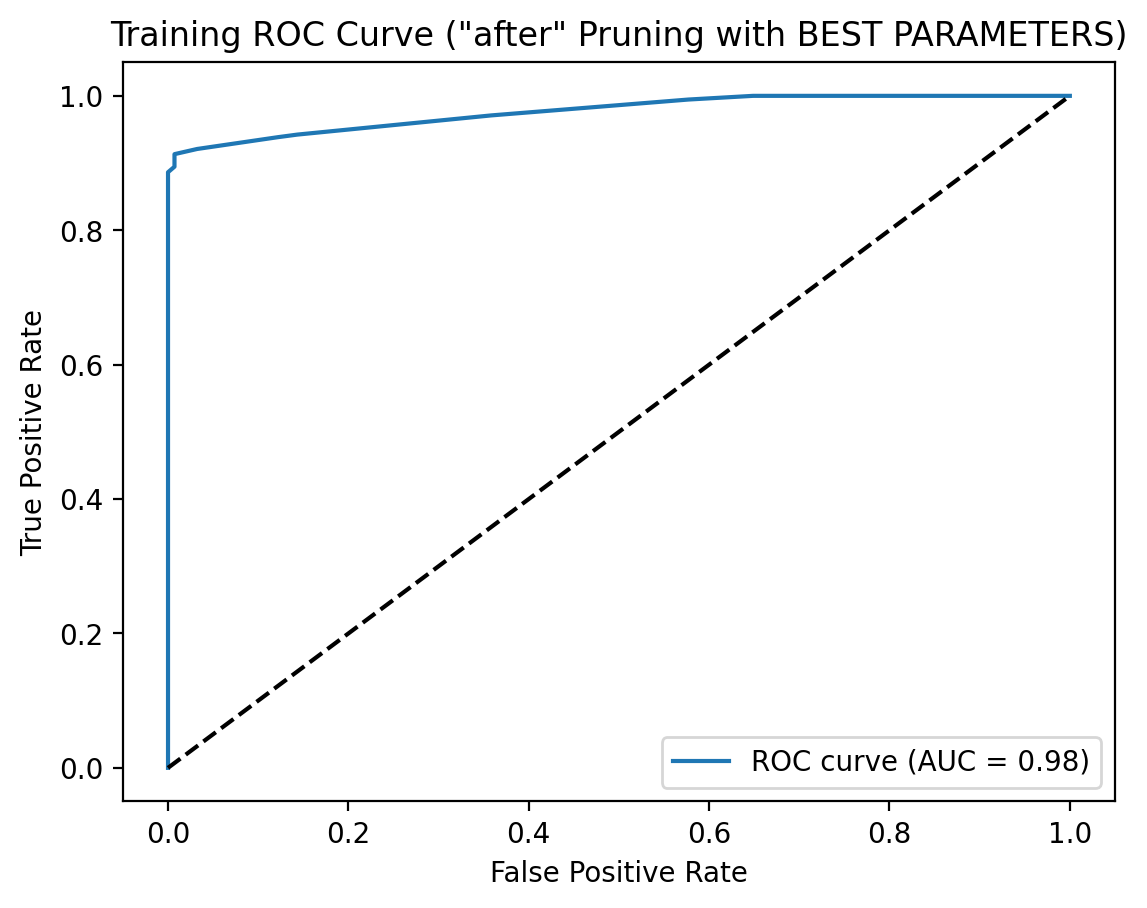

In [93]:
# --- Train the Decision Tree with SMOTE + best parameters ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Train with SMOTE-resampled data and optimized parameters (without class weights)
clf_tree = DecisionTreeClassifier(max_depth=6, max_features=14, random_state=42)  
clf_tree.fit(X_train_resampled, y_train_resampled)

# Training accuracy on resampled data
train_pred_resampled = clf_tree.predict(X_train_resampled)
train_acc_resampled = accuracy_score(y_train_resampled, train_pred_resampled)
train_f1_resampled = f1_score(y_train_resampled, train_pred_resampled)


# Evaluate on original training set
train_pred = clf_tree.predict(X_train.values)
train_acc = accuracy_score(y_train_encoded, train_pred)
train_f1 = f1_score(y_train_encoded, train_pred)

train_precision = precision_score(y_train_encoded, train_pred)

print("====== Training (on resampled data) ======")

print(f'Accuracy: {train_acc_resampled:.4f}')
print(f"Precision: {train_precision:.4f}")

# --- Compute and print TPR, FPR, and plot ROC curve for training set ---
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
train_proba = clf_tree.predict_proba(X_train.values)

cm = confusion_matrix(y_train_encoded, train_pred)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(f"Recall (TPR): {tpr:.4f}")
print(f'F1 Score: {train_f1_resampled:.4f}')
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"TPR/FPR: {(tpr/fpr if fpr > 0 else 'inf')}")
fpr_arr, tpr_arr, thresholds = roc_curve(y_train_encoded, train_proba[:, 1])
auc = roc_auc_score(y_train_encoded, train_proba[:, 1])
plt.plot(fpr_arr, tpr_arr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve ("after" Pruning with BEST PARAMETERS)')
plt.legend()
plt.show()


In [94]:
print("Depth of tree:", clf_tree.get_depth())

Depth of tree: 6


In [95]:
# --- Test accuracy ("after" Pruning) ---
X_test_all = X_test.values
y_test_encoded = le.transform(y_test)
test_pred = clf_tree.predict(X_test_all)
test_acc = accuracy_score(y_test_encoded, test_pred)
print(f'Test Accuracy ("after" Pruning): {test_acc:.4f}')

Test Accuracy ("after" Pruning): 0.9322


====== Testing ======
Accuracy: 0.9322
Precision: 0.9878
Recall (TPR): 0.9334
F1 Score: 0.9598
False Positive Rate (FPR): 0.0756
TPR/FPR: 12.341869398207427


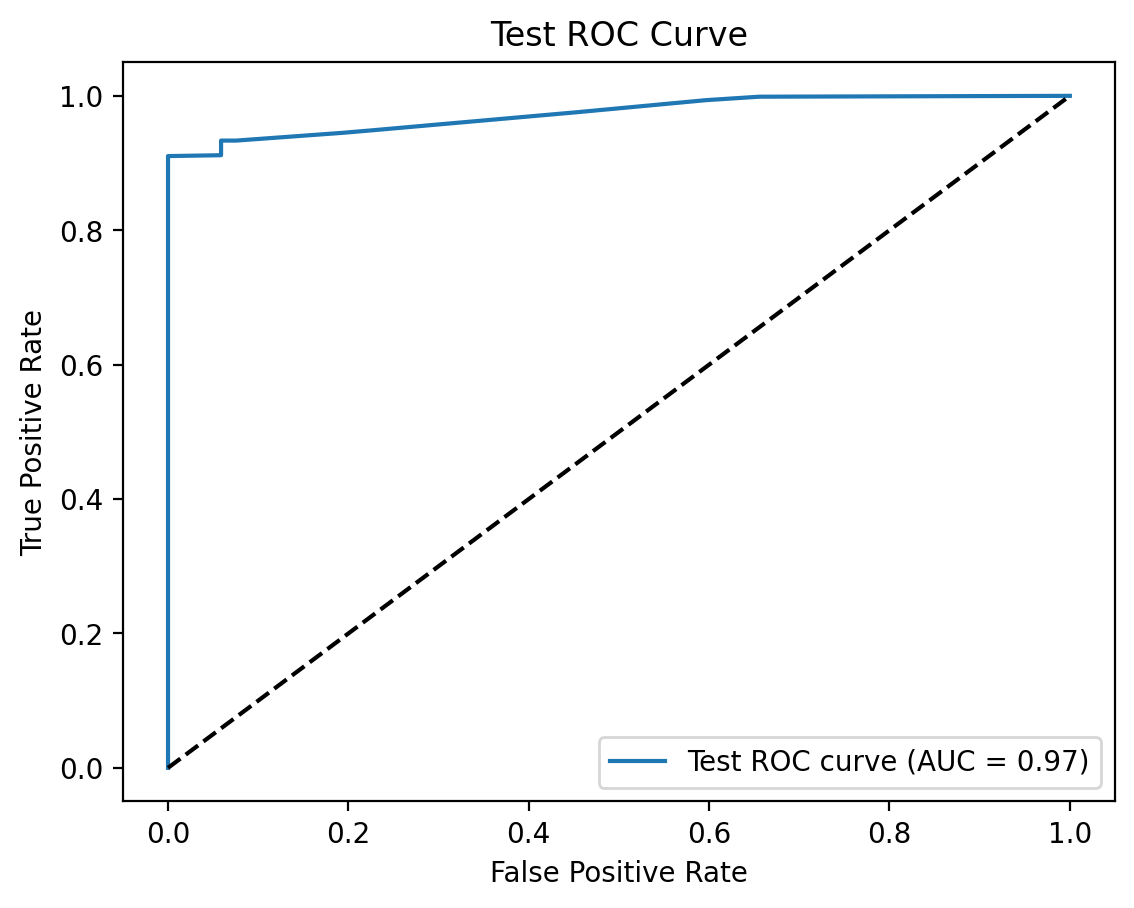

In [96]:
# --- Precision, Recall, F1, TPR, FPR for Decision Tree Model ---
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Use test set for evaluation
cm = confusion_matrix(y_test_encoded, test_pred)
tn, fp, fn, tp = cm.ravel()
precision = precision_score(y_test_encoded, test_pred)
recall = recall_score(y_test_encoded, test_pred)
f1 = f1_score(y_test_encoded, test_pred)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print("====== Testing ======")
print(f'Accuracy: {test_acc:.4f}')
print(f"Precision: {precision:.4f}")
print(f"Recall (TPR): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"TPR/FPR: {(tpr/fpr if fpr > 0 else 'inf')}")

# --- Plot ROC curve for test set ---
from sklearn.metrics import roc_curve, roc_auc_score

test_proba = clf_tree.predict_proba(X_test_all)
fpr_arr, tpr_arr, thresholds = roc_curve(y_test_encoded, test_proba[:, 1])
auc = roc_auc_score(y_test_encoded, test_proba[:, 1])
plt.plot(fpr_arr, tpr_arr, label=f'Test ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend()
plt.show()


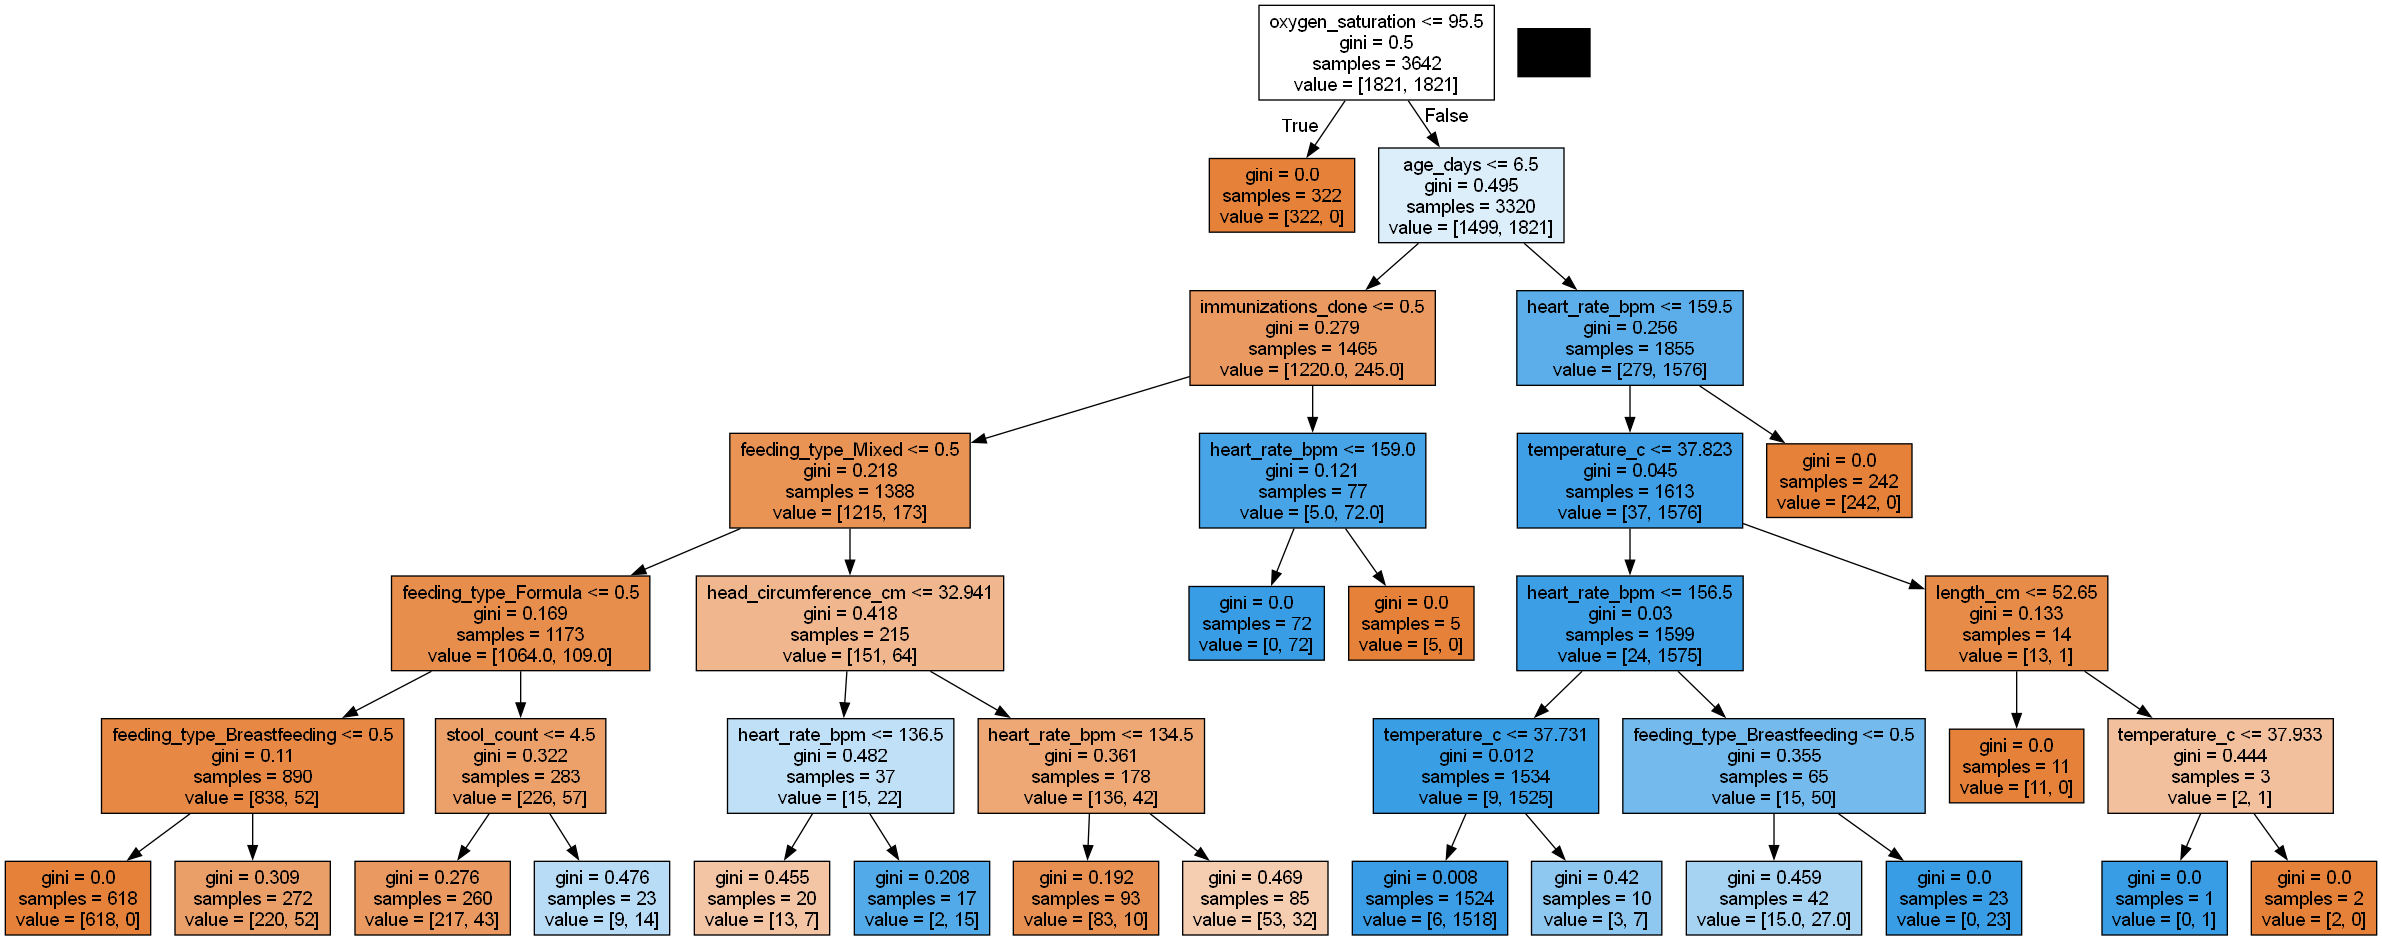

In [97]:
# --- Visualize the trained decision tree  ---
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

# Save and display the tree
feature_names = X_train.columns
tree_graph_to_png(tree=clf_tree, feature_names=feature_names, png_file_to_save='decision_tree.png')
Image(filename='decision_tree.png', width=900, height=600)